In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Linear Regression

In [2]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv') #Import raw data
df = df.set_index('name') #Index each observation by the Car Model
df['owner'] = df['owner'].apply(lambda x:0 if x == "First Owner" else 1).astype(int) # 0 means one previous owner (car is on the newer side)
# 1 means two or more previous owner and car is on the older side. This definition seems clear and more simplified
df['fuel'] = df['fuel'].apply(lambda x:'Petrol' if x == 'Petrol' else ('Diesel' if x == 'Diesel' else 'Other'))
#Simplify fuel types into 3 categories. Any fuel type that isn't petrol/diesel make up <10% of the dataset and should be lumped as other instead
df = pd.get_dummies(df, columns = ['fuel','seller_type','transmission']) #Make dummy variables for categorical variables so we can model with the data
df['year'] = 2023 - df['year'] #Transform year column into a variable representing a car's age
df = df.drop(columns = ['transmission_Automatic','seller_type_Trustmark Dealer','fuel_Other']) #Drop one column of dummy variables so we don't have singularity issues
df.columns.values[0] = 'Age'
df['selling_price'] = np.log10(df['selling_price']) #Log transform for a better fit
df['km_driven'] = np.log10(df['km_driven']) 
sp = df.pop('selling_price') #put selling price at the front
df.insert(0,'selling_price', sp)
df

,selling_price,Age,km_driven,owner,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
name,,,,,,,,,
Maruti 800 AC,4.778151,16,4.845098,0,False,True,False,True,True
Maruti Wagon R LXI Minor,5.130334,16,4.698970,0,False,True,False,True,True
Hyundai Verna 1.6 SX,5.778151,11,5.000000,0,True,False,False,True,True
Datsun RediGO T Option,5.397940,6,4.662758,0,False,True,False,True,True
Honda Amaze VX i-DTEC,5.653213,9,5.149219,1,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna 1.4 CRDi (Diesel),5.612783,9,4.903090,1,True,False,False,True,True
Hyundai i20 Magna 1.4 CRDi,5.612783,9,4.903090,1,True,False,False,True,True
Maruti 800 AC BSIII,5.041393,14,4.919078,1,False,True,False,True,True


<Axes: >

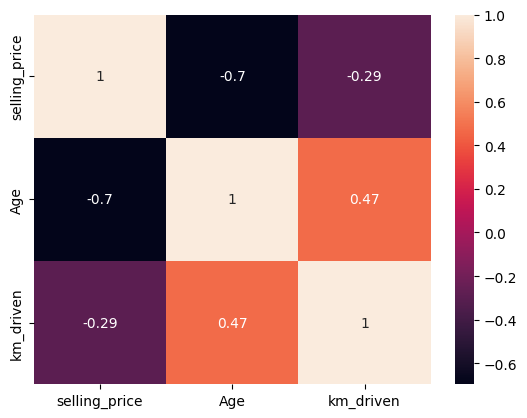

In [3]:
sns.heatmap(df.iloc[:,0:3].corr(), annot = True) #Correlation only makes sense for numeric columns

Age seems to have a fairly strong negative correlation with selling price and it makes sense as the older the car, the less money you'll get from selling it. We see however that selling price is weakly negatively correlated with km driven. However, that means the more mileage a car has, the less money you'll get if you sell it. We can also see that age is fairly positively correlated with the mileage where older cars tend to have more mileage on them.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size = .2, random_state = 0) #Split data

In [5]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print(mean_squared_error(y_test,y_pred)) #Linear regression performs ALMOST as well as Random Forest 
print(r2_score(y_test,y_pred)) #R2 is quite a bit lower than RF

#R2 without a log transformation is roughly .5 this is a huge improvement!

0.0428527525383113
0.6888511024093908


# Visualizations

[Text(0, 0.5, 'log(selling price)')]

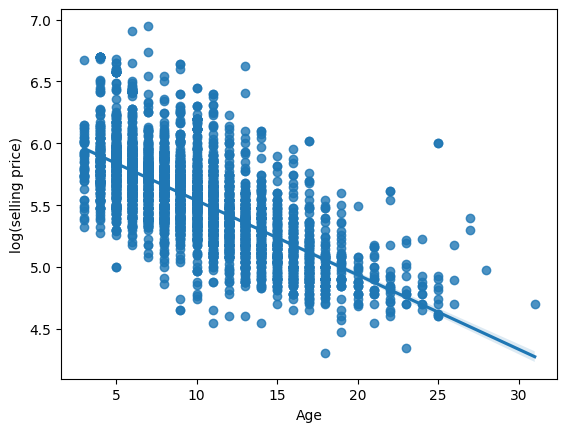

In [6]:
ax = sns.regplot(data = df, x = 'Age', y = 'selling_price', order = 1)
ax.set(ylabel = 'log(selling price)')

[Text(0, 0.5, 'log(selling price)'), Text(0.5, 0, 'log(km driven)')]

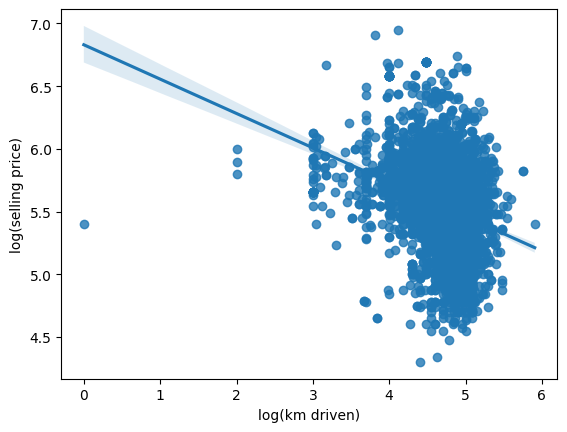

In [7]:
ax = sns.regplot(data = df, x = 'km_driven', y = 'selling_price', order = 1)
ax.set(ylabel = 'log(selling price)', xlabel = 'log(km driven)')

Polynomial Regression did not improve the models by much so we should just leave it out to make things easier for the front end. Also it makes more sense that age and km_driven has a negatively linear relationship with selling price. It would be weird for km driven to have a quadratic relationship with selling price where cars with very low and high mileage have a low selling price but cars with medium mileage has a higher selling price. The car with no mileage that sold for very little must be an outlier.

In [8]:
import pickle

pickle.dump(linreg, open("models/Regression_LinReg.pkl", "wb"))